# LOAN PREDICTION PROBLEM

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load data

In [2]:
df =pd.read_csv ('loan_prediction.csv')


In [3]:
df. to_excel('loan_prediction.xlsx')

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

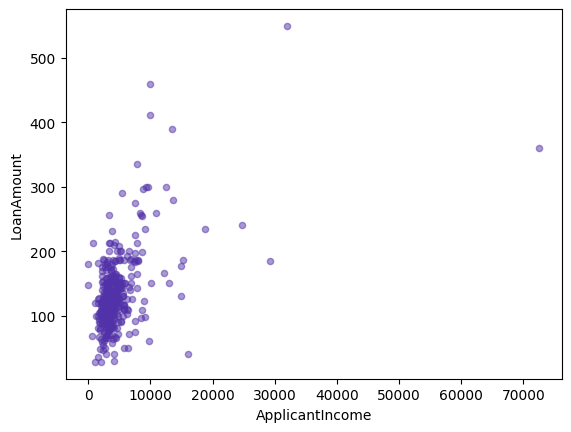

In [4]:
df.plot(kind='scatter', x='ApplicantIncome', y='LoanAmount',color= '#5232a8',alpha=0.5)

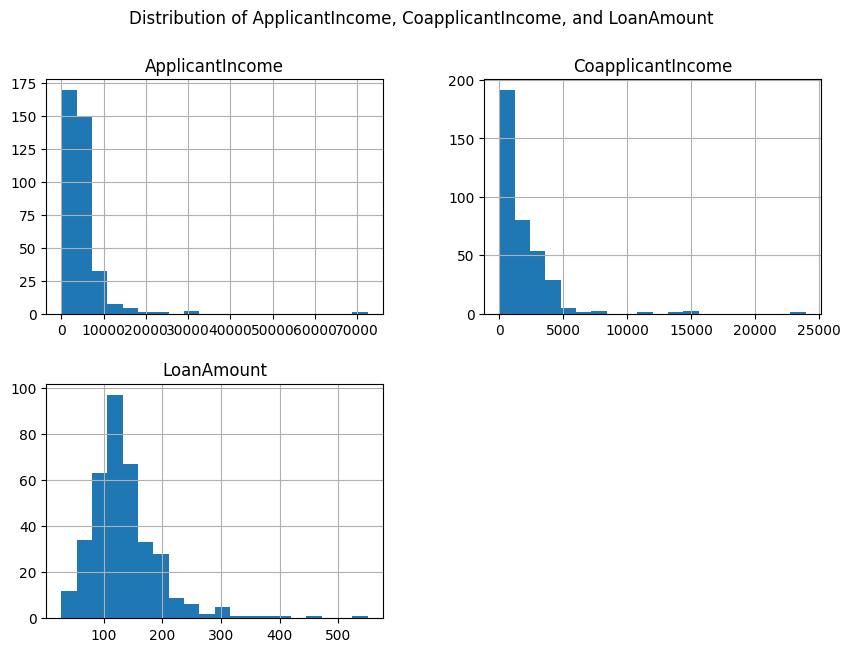

In [5]:
# Plot histograms for numerical columns
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=20, figsize=(10, 7))
plt.suptitle('Distribution of ApplicantIncome, CoapplicantIncome, and LoanAmount')
plt.show()


In [6]:
print(df)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

### 3. PERFORM EDA

In [7]:
# Display the first 5 rows of the DataFrame
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


##### Check missing values :

In [10]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Property_Area         0
dtype: int64


##### Numerical column missing value fill with median & Categorical columns missing value fill with mode 
---

In [11]:
# First fill numerical missing values with the mean
# This code is use to fill one colum value
#df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

### This code is use to fill all columns in one line

In [12]:
df.fillna({
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term':df['Loan_Amount_Term'].median(),
    'Credit_History':df['Credit_History'].median()
},inplace=True)


---
##### Q :Ab ismain ye question arise huta hy ky ham ny dependents columns ko median se fill q ni kia jabky ismain numerical value hain ?

 Ans: Dependents column numbers dikhata hai (0, 1, 2, 3+) to kya yeh categorical hai ya numerical?
 Is column ki values numbers lagti hain, lekin unmein mathematical operations ka koi real sense nahi hota.

Example:

 3+ is not a true number — it's a category meaning "3 or more".
  Aap in pe mean ya median apply nahi karte.
  In values ka use hota hai grouping ya segmentation mein — jaise decision tree splits.

  Isliye: Dependents = Categorical
 Treat karna chahiye:

  As object (string) type

---


In [13]:
#display types of each column
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


### Now we will fill Categorical columns with mode

In [14]:
df.fillna({
    'Gender': df['Gender'].mode()[0],
    'Dependents':df['Dependents'].mode()[0],
    'Self_Employed':df['Self_Employed'].mode()[0]
},inplace=True)


In [15]:
# Recheck missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

###### ✅ Missing values successfully handled!  Ab dataset mein kisi bhi column mein missing value nahi rahi.


In [16]:
# To check for duplicates
df.duplicated().sum()

np.int64(0)

#### Next Step: Outliers Detection

In [17]:
# Numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [18]:
# Outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers.sum()

ApplicantIncome      32
CoapplicantIncome     8
LoanAmount           18
dtype: int64

In [19]:
# Removing outliers using IQR method
# Function to remove outliers from one column
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [20]:
# Removing outliers from all numerical columns one by one
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    df = remove_outliers_iqr(df, col)

In [21]:
# Check new shape
print("New shape after removing outliers:", df.shape)



New shape after removing outliers: (324, 12)
